In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/stroke-dataset.csv")

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [ ]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x=df2.iloc[:,[3,4]].values

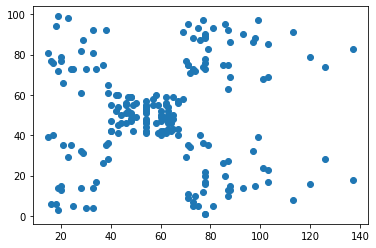

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'])

In [ ]:
import numpy as np
import math
def DBSCANCluster(df,epsilon,minPts):
    #initially all point labeled as 0-(not clustered)
    labels = [0 for i in range (len(df))]
    cluster_id=0 #to_maintain a unique cluster id
    l = len(df)
    for pts in range(0,l):
        if(labels[pts]!=0): #if already lebeled skip
            continue
        else:
            nbors = findNeighbors(df,epsilon,pts) #find all neighbors of pts
            if (minPts>len(nbors)): #if minpts greater than total neighbors then its a noise point(-1)
                labels[pts] = -1
            else:
                cluster_id+=1 #increment cluster_id
                make_cluster(cluster_id,df,pts,labels,nbors,minPts,epsilon)
    return labels

            


def findNeighbors(df,epsilon,pts):
    nbors=[]
    l = len(df)
    for pt in range(0,l):
        if math.dist(df[pts],df[pt]) <= epsilon: # calculating distance from pts to all point
            nbors.append(pt) #if greater than eps appending the points index to list
        else:
            pass
    return nbors

def make_cluster(c_id,df,pts,labels,nbors,minPts,epsilon):
    labels[pts] = c_id #labeled the core point
    i=0
    while True:
        if(i>=len(nbors)):
          break
        if labels[nbors[i]] == 0: #if neighbor isnt visited add this to cluster
            labels[nbors[i]] = c_id

            newNbors = findNeighbors(df,epsilon,nbors[i])

            if  (len(newNbors)>=minPts):
                nbors = nbors+newNbors
            else:
                pass
        elif labels[nbors[i]] == -1: # if its a noise point add this to cluster but wont grow the cluster from it
            labels[nbors[i]] = c_id 
        i+=1
        

In [ ]:
db = DBSCANCluster(x,epsilon=5,minPts=5)

In [ ]:
db

[-1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 2,
 2,
 2,
 2,
 -1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 -1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 -1,
 -1,
 3,
 -1,
 -1,
 4,
 3,
 4,
 3,
 -1,
 3,
 4,
 5,
 4,
 3,
 4,
 3,
 4,
 5,
 -1,
 5,
 4,
 -1,
 -1,
 3,
 -1,
 5,
 -1,
 5,
 -1,
 3,
 -1,
 5,
 -1,
 3,
 -1,
 3,
 -1,
 -1,
 -1,
 5,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [ ]:
df2['cluster'] = db

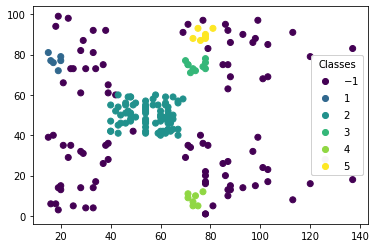

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],c=df2['cluster'])

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center right", title="Classes")
ax.add_artist(legend1)
plt.show()